In [4]:
### https://stackoverflow.com/questions/56035562/3d-dicom-visualisation-in-python

In [5]:
# !pip install imagecodecs
# !pip install opencv

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from skimage import measure
from scipy import ndimage
import nibabel as nib
import numpy as np
import PIL
import cv2
import os

def plot_3d(image, threshold=-300):
    from skimage import io
    p = image
    # p = image.transpose(2,1,0)
    p = ndimage.rotate(p, 180, axes=(1,0))
    p = ndimage.zoom(p, (0.5, 0.5, 1), order= 3)
    # p = image
    verts, faces, normals, values = measure.marching_cubes_lewiner(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')    
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
#     plt.show()
    plt.savefig('/content/drive/MyDrive/JN/NN/COVID_detection_picture/3Dimages/out_3D.png')
    # return fig

In [8]:
path_to_image = "/content/drive/MyDrive/JN/NN/COVID_detection_picture/MRI/sick_7c7160149aec1ebf15b28166f5458c49.nii"
image = nib.load(path_to_image)
print(type(image))
image = image.get_data()
print(type(image))
image.shape, type(image)

<class 'nibabel.nifti1.Nifti1Image'>
<class 'numpy.memmap'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.


((512, 512, 45), numpy.memmap)

NoneType

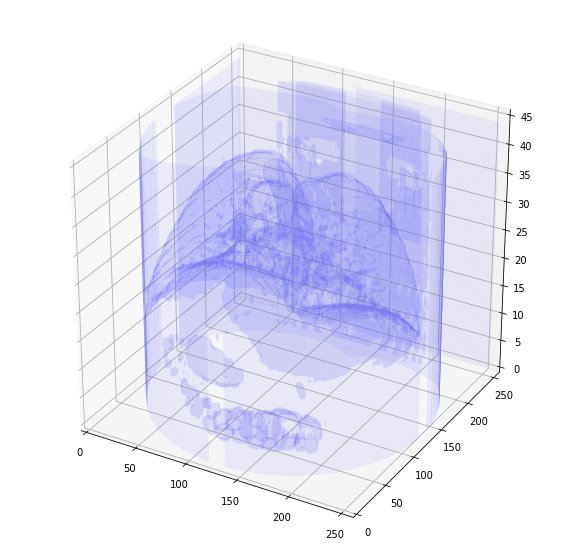

In [9]:
image3D = plot_3d(image, threshold=-300)
type(image3D)

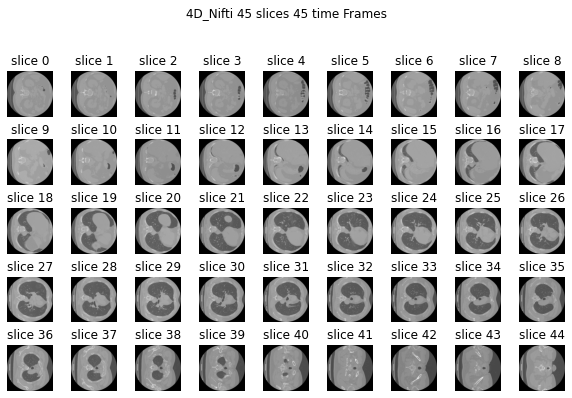

In [10]:
# plt.rcParams["figure.figsize"] = (9,9)

number_of_row = 9
number_of_cell = 5
# fig_heights = [slc[0].shape[0] for slc in image]
# fig_widths = [slc.shape[1] for slc in image.shape[1]]
fig_with = 8
fig_height = fig_with * number_of_cell / number_of_row 
fig, ax = plt.subplots(number_of_cell, number_of_row, constrained_layout=False, figsize=(fig_with, fig_height))

fig.canvas.set_window_title('SICK PATIENT = 4D Nifti Image')
#-------------------------------------------------------------------------------
mng = plt.get_current_fig_manager();
mng.full_screen_toggle();
for idx, slice in enumerate(range(0, number_of_cell * number_of_row, number_of_row)):
    for frame in range(number_of_row):
        # if your data in 4D, otherwise remove this loop
        ax[idx, frame].imshow(image[:,:, frame + slice], cmap='gray', interpolation=None)
        ax[idx, frame].set_title(f"slice {frame + slice}", )
        ax[idx, frame].axis('off')
plt.subplots_adjust(wspace=0, hspace = number_of_cell / 10, left=0, right=1, bottom=0, top=1)
fig.suptitle(x=0.5, y=1.2, t=f'4D_Nifti {number_of_cell * number_of_row} slices 45 time Frames', fontsize=12)

plt.show() 